<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/work/MMI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [267]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


In [268]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime
#plt.style.use('seaborn-whitegrid')

In [269]:
nifty = pd.read_csv('/content/MMI_2024-02-17.csv')
#nifty = pd.read_csv('/content/a.csv')
colnames= ['Date','MMI','Nifty']
nifty.columns=colnames

In [270]:
nifty.head(2)

,Date,MMI,Nifty
0,16/02/2024,31.244728,22040.70
1,15/02/2024,34.923648,21910.75


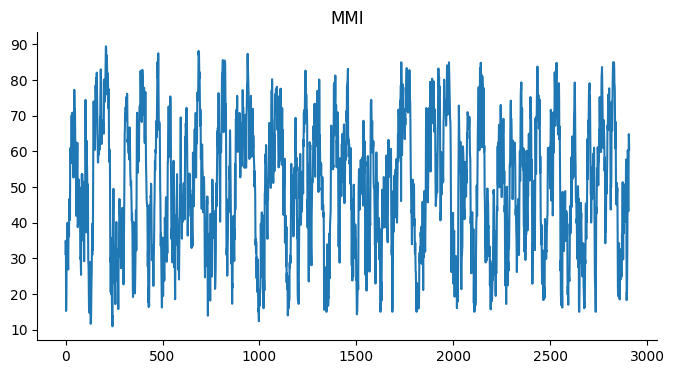

In [271]:
# @title MMI

from matplotlib import pyplot as plt
nifty['MMI'].plot(kind='line', figsize=(8, 4), title='MMI')
plt.gca().spines[['top', 'right']].set_visible(False)

In [272]:
#data = pd.DataFrame({'Date':['14/02/2024'] ,'MMI': [33],'Nifty':[21925.00]})

In [273]:
#nifty= pd.concat([data,nifty],axis=0)
nifty.head(3)

,Date,MMI,Nifty
0,16/02/2024,31.244728,22040.70
1,15/02/2024,34.923648,21910.75
2,14/02/2024,33.572794,21840.05


In [274]:
nifty['Date']=pd.to_datetime(nifty['Date'],format='%d/%m/%Y')

In [275]:
'''
if TypeError or ValueError:
    nifty['Date']=pd.to_datetime(nifty['Date'],format='%d-%m-%Y')
else:
    nifty['Date']=pd.to_datetime(nifty['Date'],format='%d/%m/%Y')
'''

"\nif TypeError or ValueError:\n    nifty['Date']=pd.to_datetime(nifty['Date'],format='%d-%m-%Y')\nelse:\n    nifty['Date']=pd.to_datetime(nifty['Date'],format='%d/%m/%Y')\n"

In [276]:
nifty= nifty.set_index('Date')

In [277]:
nifty = nifty.loc[~nifty.index.duplicated(keep='first')]

In [278]:
nifty_new=nifty[::-1].copy()

In [279]:
from sklearn.preprocessing import StandardScaler

In [280]:
scaler = StandardScaler()

In [281]:
stdv = 1.8
nifty_new['macd']=nifty_new['MMI'].ewm(span=50, adjust=False).mean()-nifty_new['MMI'].ewm(span=200, adjust=False).mean()
nifty_new['signal']=nifty_new['macd'].ewm(span=20,adjust=False).mean()
nifty_new['Sdev'] = nifty_new['macd'].rolling(window=30).std()
nifty_new['Upper Band'] = nifty_new['signal'] + (nifty_new['Sdev'] *stdv)
nifty_new['Lower Band'] = nifty_new['signal'] - (nifty_new['Sdev'] *stdv)
nifty_new['difference']=nifty_new['Upper Band']-nifty_new['Lower Band']
nifty_new['difference']=scaler.fit_transform(nifty_new['difference'].values.reshape(-1,1))
#nifty_new['Upper Band']=nifty['Upper Band'].shift(-35)
#nifty_new['Lower Band']=nifty['Lower Band'].shift(-35)

In [282]:
nifty['30 Day'] = nifty['MMI'][::-1].rolling(window=30).mean()
nifty['10 Day'] = nifty['MMI'][::-1].rolling(window=10).mean()
nifty['50ema'] = nifty['Nifty'][::-1].ewm(span=50,adjust=False).mean()

# MMI Plot Vs Nifty

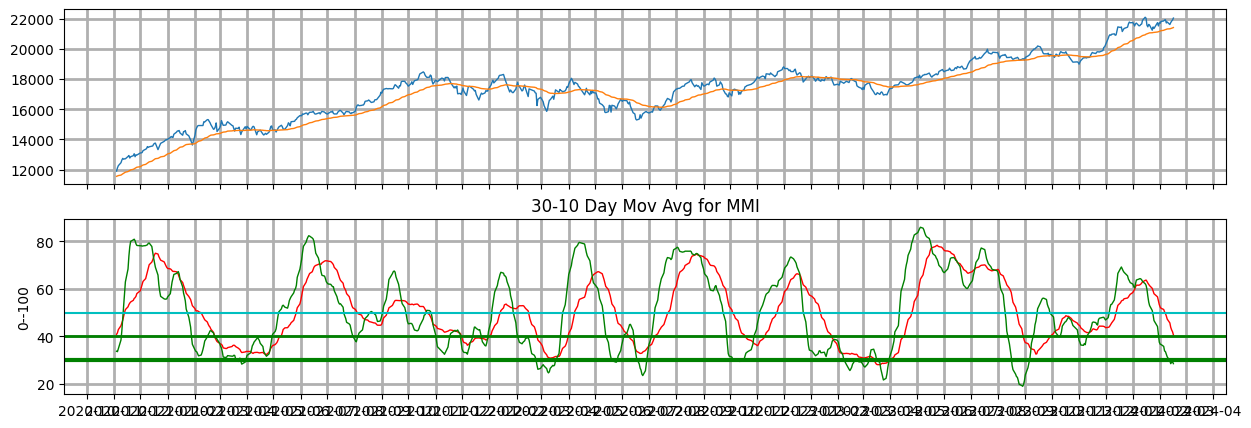

In [283]:
from matplotlib.dates import MonthLocator, YearLocator
t=800
fig, ax = plt.subplots(2,1,figsize=(15,5),sharex=True)

ax[0].plot(nifty.index.values[:t],nifty['Nifty'].values[:t],linewidth=1 )
ax[0].plot(nifty.index.values[:t],nifty['50ema'].values[:t],linewidth=1 )
ax[1].plot(nifty.index.values[:t],nifty['30 Day'].values[:t],color='r',linewidth=1 )
ax[1].plot(nifty.index.values[:t],nifty['10 Day'].values[:t],color= 'g',linewidth=1 )

ax[1].axhline(y=50 , color= 'c')
ax[1].axhline(y=40 , color= 'g',linewidth=2)
ax[1].axhline(y=30 , color= 'g',linewidth=3)
plt.title('30-10 Day Mov Avg for MMI')
plt.ylabel('0--100')
#fig.savefig('test2png.png', dpi=150)
yloc = YearLocator()
mloc = MonthLocator()
ax[0].xaxis.set_major_locator(mloc)
ax[1].xaxis.set_major_locator(mloc)
#ax[2].xaxis.set_major_locator(mloc)
ax[0].grid(linewidth =2)
ax[1].grid(linewidth =2)
#ax[2].grid(linewidth =2)

plt.savefig('mmi.png')
plt.show()

In [284]:
nifty=nifty.head(800)

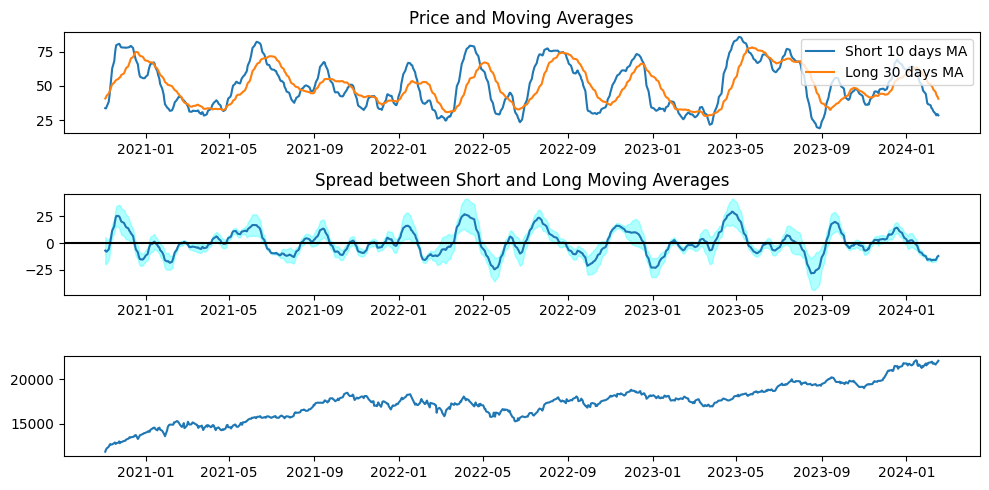

In [285]:
# Define the short and long moving averages
short_window = 10
long_window = 30

# Calculate the short and long moving averages
nifty['Short_MA'] = nifty['10 Day']
nifty['Long_MA'] = nifty['30 Day']
# Calculate the spread between the two moving averages
nifty['Spread'] = nifty['Short_MA'] - nifty['Long_MA']

# Calculate the standard deviation of the spread
nifty['Spread_Std'] = nifty['Spread'].rolling(window=20, min_periods=1).std()

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 5))

# Plot the data in the first subplot
#axes[0].plot(nifty.index, nifty['Price'], label='Price')
axes[0].plot(nifty.index, nifty['Short_MA'], label=f'Short {short_window} days MA')
axes[0].plot(nifty.index, nifty['Long_MA'], label=f'Long {long_window} days MA')
axes[0].set_title('Price and Moving Averages')
axes[0].legend()

# Plot the spread with standard deviation bands in the second subplot
axes[1].plot(nifty.index, nifty['Spread'], label='Spread')
axes[1].fill_between(nifty.index, nifty['Spread'] + nifty['Spread_Std'], nifty['Spread'] - nifty['Spread_Std'], color='cyan', alpha=0.3, label='Spread Std Dev Bands')
axes[1].set_title('Spread between Short and Long Moving Averages')
axes[1].axhline(y=0, color='black')
#axes[1].legend()

axes[2].plot(nifty.index, nifty['Nifty'], label='Price')
# Adjust layout to prevent clipping of titles
plt.tight_layout()

plt.show()


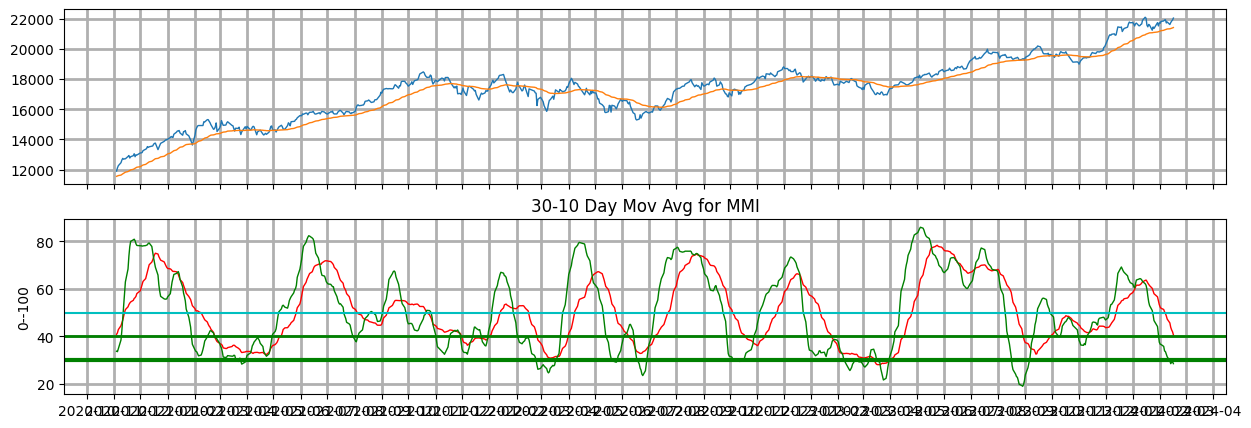

In [286]:
from matplotlib.dates import MonthLocator, YearLocator
t=1600
fig, ax = plt.subplots(2,1,figsize=(15,5),sharex=True)

ax[0].plot(nifty.index.values[:t],nifty['Nifty'].values[:t],linewidth=1 )
ax[0].plot(nifty.index.values[:t],nifty['50ema'].values[:t],linewidth=1 )
ax[1].plot(nifty.index.values[:t],nifty['30 Day'].values[:t],color='r',linewidth=1 )
ax[1].plot(nifty.index.values[:t],nifty['10 Day'].values[:t],color= 'g',linewidth=1 )

ax[1].axhline(y=50 , color= 'c')
ax[1].axhline(y=40 , color= 'g',linewidth=2)
ax[1].axhline(y=30 , color= 'g',linewidth=3)
plt.title('30-10 Day Mov Avg for MMI')
plt.ylabel('0--100')
#fig.savefig('test2png.png', dpi=150)
yloc = YearLocator()
mloc = MonthLocator()
ax[0].xaxis.set_major_locator(mloc)
ax[1].xaxis.set_major_locator(mloc)
#ax[2].xaxis.set_major_locator(mloc)
ax[0].grid(linewidth =2)
ax[1].grid(linewidth =2)
#ax[2].grid(linewidth =2)


plt.show()

In [287]:
nifty_1000=nifty_new[-1000:].copy()

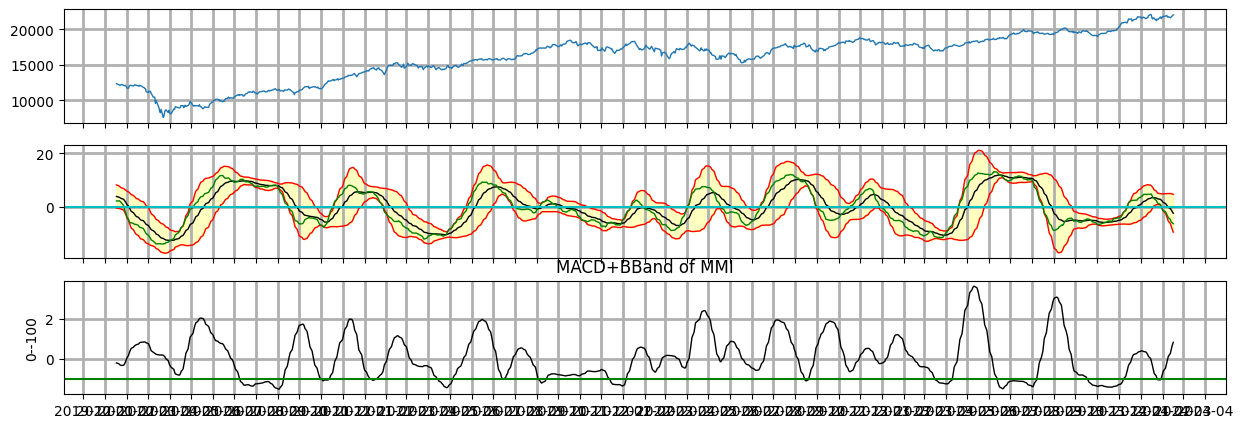

In [288]:
from matplotlib.dates import MonthLocator, YearLocator
fig, ax = plt.subplots(3,1,figsize=(15,5),sharex=True)

ax[0].plot(nifty_1000.index.values,nifty_1000['Nifty'].values,linewidth=1 )
ax[1].plot(nifty_1000.index.values,nifty_1000['signal'].values,color='k',linewidth=1 )
ax[1].plot(nifty_1000.index.values[:],nifty_1000['Upper Band'].values[:],color='r',linewidth=1 )
ax[1].plot(nifty_1000.index.values[:],nifty_1000['Lower Band'].values[:],color='r',linewidth=1 )
ax[1].fill_between(
    nifty_1000.index.values[:],nifty_1000['Upper Band'].values[:], nifty_1000['Lower Band'].values[:],
    interpolate=True, color="yellow", alpha=0.25,
    label="Positive"
)
ax[1].plot(nifty_1000.index.values[:],nifty_1000['macd'].values[:],color= 'g',linewidth=1 )
ax[2].plot(nifty_1000.index.values[:],nifty_1000['difference'].values[:],color= 'k',linewidth=1)
#ax[0].plot(nifty_new.index.values[:],nifty_new['50ema'].values[:],color= 'b',linewidth=1 )
ax[1].axhline(y=0 , color= 'c')
plt.title('MACD+BBand of MMI')
plt.ylabel('0--100')
#fig.savefig('test2png.png', dpi=150)
yloc = YearLocator()
mloc = MonthLocator()
ax[0].xaxis.set_major_locator(mloc)
ax[1].xaxis.set_major_locator(mloc)
ax[2].xaxis.set_major_locator(mloc)
ax[0].grid(linewidth =2)
ax[1].grid(linewidth =2)
ax[2].grid(linewidth =2)
ax[2].axhline(y=-1 , color= 'g')
plt.savefig('mmi_bb.png')
plt.show()


In [292]:
nifty_500=nifty_new[-500:].copy()

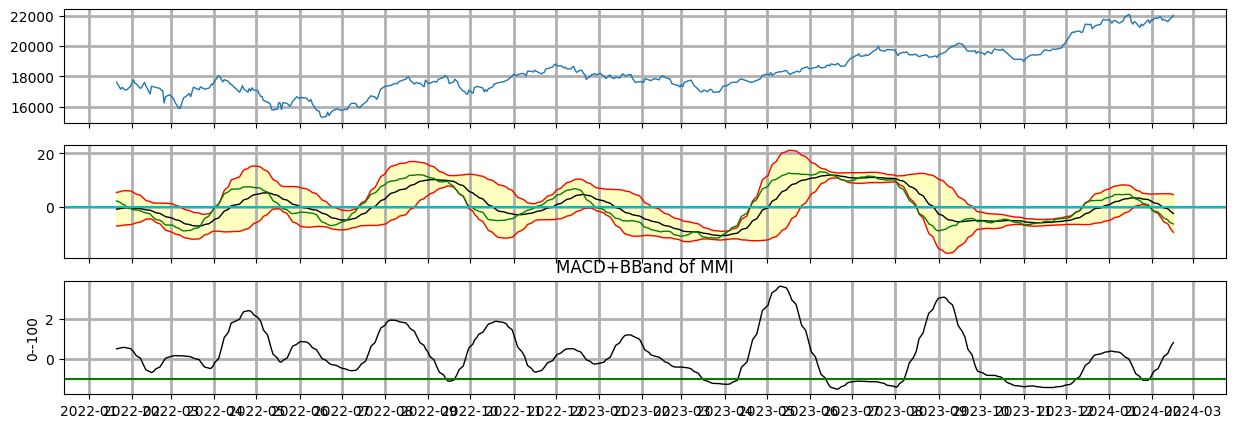

In [293]:
fig, ax = plt.subplots(3,1,figsize=(15,5),sharex=True)

ax[0].plot(nifty_500.index.values,nifty_500['Nifty'].values,linewidth=1 )
ax[1].plot(nifty_500.index.values,nifty_500['signal'].values,color='k',linewidth=1 )
ax[1].plot(nifty_500.index.values[:],nifty_500['Upper Band'].values[:],color='r',linewidth=1 )
ax[1].plot(nifty_500.index.values[:],nifty_500['Lower Band'].values[:],color='r',linewidth=1 )
ax[1].fill_between(
    nifty_500.index.values[:],nifty_500['Upper Band'].values[:], nifty_500['Lower Band'].values[:],
    interpolate=True, color="yellow", alpha=0.25,
    label="Positive"
)
ax[1].plot(nifty_500.index.values[:],nifty_500['macd'].values[:],color= 'g',linewidth=1 )
ax[2].plot(nifty_500.index.values[:],nifty_500['difference'].values[:],color= 'k',linewidth=1)
#ax[0].plot(nifty_new.index.values[:],nifty_new['50ema'].values[:],color= 'b',linewidth=1 )
ax[1].axhline(y=0 , color= 'c')
plt.title('MACD+BBand of MMI')
plt.ylabel('0--100')
#fig.savefig('test2png.png', dpi=150)
yloc = YearLocator()
mloc = MonthLocator()
ax[0].xaxis.set_major_locator(mloc)
ax[1].xaxis.set_major_locator(mloc)
ax[2].xaxis.set_major_locator(mloc)
ax[0].grid(linewidth =2)
ax[1].grid(linewidth =2)
ax[2].grid(linewidth =2)
ax[2].axhline(y=-1 , color= 'g')

plt.show()

Text(0.5, 1.0, 'MMI')

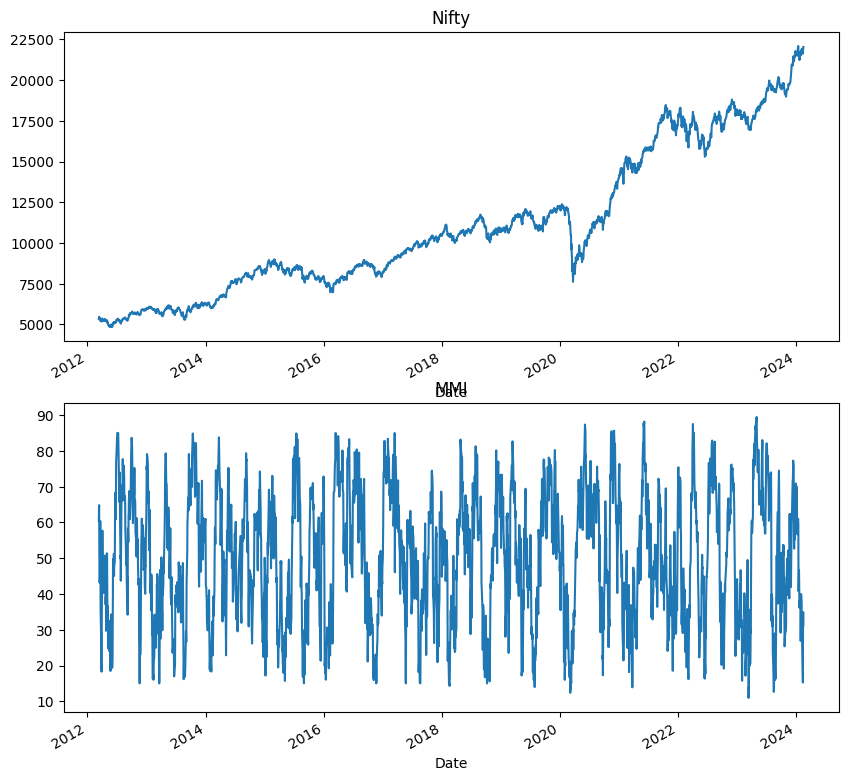

In [289]:
# prompt: Using dataframe nifty_new: create sub plots of nifty and MMI using matplotlib and make it readable

import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# Plot Nifty on the first subplot
nifty_new['Nifty'].plot(ax=ax1, label='Nifty')
ax1.set_title('Nifty')

# Plot MMI on the second subplot
nifty_new['MMI'].plot(ax=ax2, label='MMI')
ax2.set_title('MMI')

#